    Michael Ersevim - DSC540 Week 9 & 10, Activities 9:

In [1]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [2]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE #standard work-around for https sites

In [32]:
# Read the HTML from the URL
gut_top = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(gut_top)
type(response) #we should get a 'models.response' if all is good


requests.models.Response

In [33]:
# Write a small function to check the status of web request
def status_check(r):
    if r.status_code == 200: #the code for 'it worked'
        print("success!")
        return 1
    else:
        print("Failed")
        return -1

In [34]:
status_check(response) # check response - all good!

success!


1

In [35]:
#Decode the response and pass on to BeautifulSoup for HTML parsing
def encoding_check(r):
    return (r.encoding)

encoding_check(response) #wil return the encoding schema. UTF-8 is most widely used

'UTF-8'

In [36]:
def decode_content(r,encoding):
    return (r.content.decode(encoding)) #decodes using the schema found above

contents = decode_content(response, encoding_check(response)) # this gives us some content to check the length and 
type(contents)
#len(contents)

58537

In [37]:
#Pass on to BeautifulSoup for HTML parsing
from bs4 import BeautifulSoup #needed
soup = BeautifulSoup(contents, 'html.parser') #needed
txt_dump = soup.text
type(txt_dump) #ask for type and hope to get 'str'


str

In [38]:
len(txt_dump) #see how long the string is

26330

In [39]:
print(txt_dump[2002:3195])

n Swift (460)
Great Expectations by Charles Dickens (444)
Jane Eyre: An Autobiography by Charlotte Brontë (430)
Ulysses by James Joyce (420)
Heart of Darkness by Joseph Conrad (409)
The Importance of Being Earnest: A Trivial Comedy for Serious People by Oscar Wilde (404)
The Souls of Black Folk by W. E. B.  Du Bois (386)
Bokwala: The Story of a Congo Victim by H. Grattan Guinness and A Congo Resident (364)
The Prince by Niccolò Machiavelli (353)
From Missouri by Zane Grey (337)
Grimms' Fairy Tales by Jacob Grimm and Wilhelm Grimm (334)
The Iliad by Homer (328)
The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson (325)
Ninth Avenue by Maxwell Bodenheim (317)
Metamorphosis by Franz Kafka (317)
Narrative of the Life of Frederick Douglass, an American Slave by Frederick Douglass (316)
Sam in the Suburbs by P. G.  Wodehouse (311)
The Awakening, and Selected Short Stories by Kate Chopin (303)
Crime and Punishment by Fyodor Dostoyevsky (302)
The Interesting Narrative of the L

In [40]:
# Find all the href tags and store them in the list of links. 
text_list = [] #empty list created

for d in soup.find_all(href = True): #finds all href instances
    text_list.append(d.text)

In [41]:
for i in text_list:
    print(i) #let's see what had an 'href'





























About
          ▾

About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use
Search and Browse
      	  ▾

Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs
Help
          ▾

All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →
Donate
Donation
Top 100 EBooks yesterday
Top 100 Authors yesterday
Top 100 EBooks last 7 days
Top 100 Authors last 7 days
Top 100 EBooks last 30 days
Top 100 Authors last 30 days
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (2079)
Pride and Prejudice by Jane Austen (1394)
Alice's Adventures in Wonderland by Lewis Carroll (722)
The Great Gatsby by F. Scott  Fitzgerald (683)
The Adventures of Sherlock Holmes by Arthur Conan Doyle (657)
The Worst Joke in the World by E

In [44]:
print(text_list[0:29]) #Check how the list looks like - print first 30 elements

['', '', '', '', '\n\n\n\n\n\n\n\n\n\n', '\n\n\n\n\n\n\n\n\n', '\n\n', 'About\n          ▾\n', 'About Project Gutenberg', 'Collection Development', 'Contact Us', 'History & Philosophy', 'Permissions & License', 'Privacy Policy', 'Terms of Use', 'Search and Browse\n      \t  ▾\n', 'Book Search', 'Bookshelves', 'Frequently Downloaded', 'Offline Catalogs', 'Help\n          ▾\n', 'All help topics →', 'Copyright Procedures', 'Errata, Fixes and Bug Reports', 'File Formats', 'Frequently Asked Questions', 'Policies →', 'Public Domain eBook Submission', 'Submitting Your Own Work']


In [46]:
# Use regular expression to find the numeric digits in these links.
# These are the file number for the Top 100 books.
# Initialize empty list to hold the file numbers
title_num = [] #empty list created

for i in range(19,118): #find top 100 books
    link = text_list[i]
    link = link.strip()

# Regular expression to find the numeric digits in the link (href) string
    n = re.findall('[0-9]+',link) #using '+' causes RE to match 1 or more rep of the preceding RE
    if len(n) == 1:
        # Append the filenumber casted as integer
        title_num.append(int(n[0]))

print(title_num)

[100, 100, 2079, 1394, 722, 683, 657, 637, 598, 573, 552, 537, 534, 515, 510, 465, 464, 460, 444, 430, 420, 409, 404, 386, 364, 353, 337, 334, 328, 325, 317, 317, 316, 311, 303, 302, 302, 301, 301, 294, 275, 270, 267, 263, 254, 248, 245, 242, 242, 239, 238, 238, 227, 221, 219, 219, 219, 216, 215, 214, 214, 213, 211, 210, 205, 202, 197, 197, 197, 190, 189, 188, 184, 177, 177, 173, 171, 170, 170, 168]


In [47]:
print(soup.text[:2000]) #print first 2000 characters





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-02-11126877
last 7 days960382
last 30 days4575946



Top 100 EBooks yesterda

In [48]:
# Temp empty list of Ebook names
lst_titles_temp = []

In [49]:
start_idx = soup.text.splitlines().index('Top 100 EBooks yesterday')

In [50]:
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

In [51]:
#Use regular expression to extract only text from the name strings and append to an empty list
lst_titles = [] #empty list

for i in range(100):
    id1,id2 = re.match('^[a-zA-Z ]*', lst_titles_temp[i]).span() #caret to match pattern at start/asterisk to
    lst_titles.append(lst_titles_temp[i][id1:id2]) # match 0 or more of the preceding re

In [52]:
for l in lst_titles:
    print(l) #iterates and prints out the list

Top 
Top 
Top 
Top 


Top 

Frankenstein
Pride and Prejudice by Jane Austen 
Alice
The Great Gatsby by F
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
The Worst Joke in the World by Elisabeth Sanxay Holding 
The Scarlet Letter by Nathaniel Hawthorne 
A Tale of Two Cities by Charles Dickens 
The Picture of Dorian Gray by Oscar Wilde 
Dracula by Bram Stoker 
Moby Dick
A Doll
The Yellow Wallpaper by Charlotte Perkins Gilman 
Adventures of Huckleberry Finn by Mark Twain 
A Christmas Carol in Prose
A Modest Proposal by Jonathan Swift 
Great Expectations by Charles Dickens 
Jane Eyre
Ulysses by James Joyce 
Heart of Darkness by Joseph Conrad 
The Importance of Being Earnest
The Souls of Black Folk by W
Bokwala
The Prince by Niccol
From Missouri by Zane Grey 
Grimms
The Iliad by Homer 
The Strange Case of Dr
Ninth Avenue by Maxwell Bodenheim 
Metamorphosis by Franz Kafka 
Narrative of the Life of Frederick Douglass
Sam in the Suburbs by P
The Awakening
Crime and Punishment by Fyodo

Michael Ersevim - DSC540 Week 9 & 10, Activities 10

In [1]:
import urllib.request, urllib.parse, urllib.error, json

In [6]:
pwd

'C:\\Users\\mersevim'

In [52]:
with open('APIkey.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [53]:
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+omdbapi

In [54]:
def print_json(json_data):
    list_keys = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [55]:
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [56]:
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        #url = "http://www.omdbapi.com/?&apikey=520e5a09__;!!DHXL-mcXkJmB!sZWyjcwKt-YCQuJ8MtU7OIR5B-uFyakJM-pY6BnZKs3NsqIpwz5yIYJJYJjb$&t=titanic"
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [57]:
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=520e5a09
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,117,107
imdbID: tt0120338
--------------------------------------------------


In [60]:
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=520e5a09
Error encountered:  Movie not found!


Exercise # 3- Connect to Twitter

In [59]:
pip install twitter

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import twitter
api = twitter.Api(consumer_key='H1TPQUYwIFmqMo2xOWqFuegsn',
  consumer_secret='your_consumer_secret',
    access_token_key='your_access_token_key',
    access_token_secret='your_access_token_secret')

In [ ]:
print(api.VerifyCredentials())

Exercise # 4- Visualizatios of prior datasets

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
rodf = pd.read_csv("RO_Data.csv") #old data from my job regarding cost of services by service variables

In [118]:
rodf.head() # take a peek

,Start Eff Date,End Eff Date,Cost,City,County,State,Zip,ABN,Svc Type,Mat,Sched,SCode,Qty,TempOrPerm,Container,SizeInYds
0,11/6/2020,NaN,54.00,SARASOTA,Manatee,FL,34243,2355,DSP,WD,SOC,NaN,1,Permanent,OT,30.0
1,8/1/2021,NaN,81.77,BELTSVILLE,Prince Georges,MD,20705,2355,DSP,C&D,SOC,NaN,1,Permanent,OT,20.0
2,9/1/2021,NaN,391.68,ALEXANDRIA,Fairfax,VA,22306,2355,DSP,C&D,SOC,NaN,1,Permanent,OT,30.0
3,7/1/2021,8/31/2021,384.18,ALEXANDRIA,Fairfax,VA,22306,2355,DSP,C&D,SOC,NaN,1,Permanent,OT,30.0
4,5/5/2021,6/30/2021,365.88,ALEXANDRIA,Fairfax,VA,22306,2355,DSP,C&D,SOC,NaN,1,Permanent,OT,30.0


<AxesSubplot:xlabel='State', ylabel='Cost'>

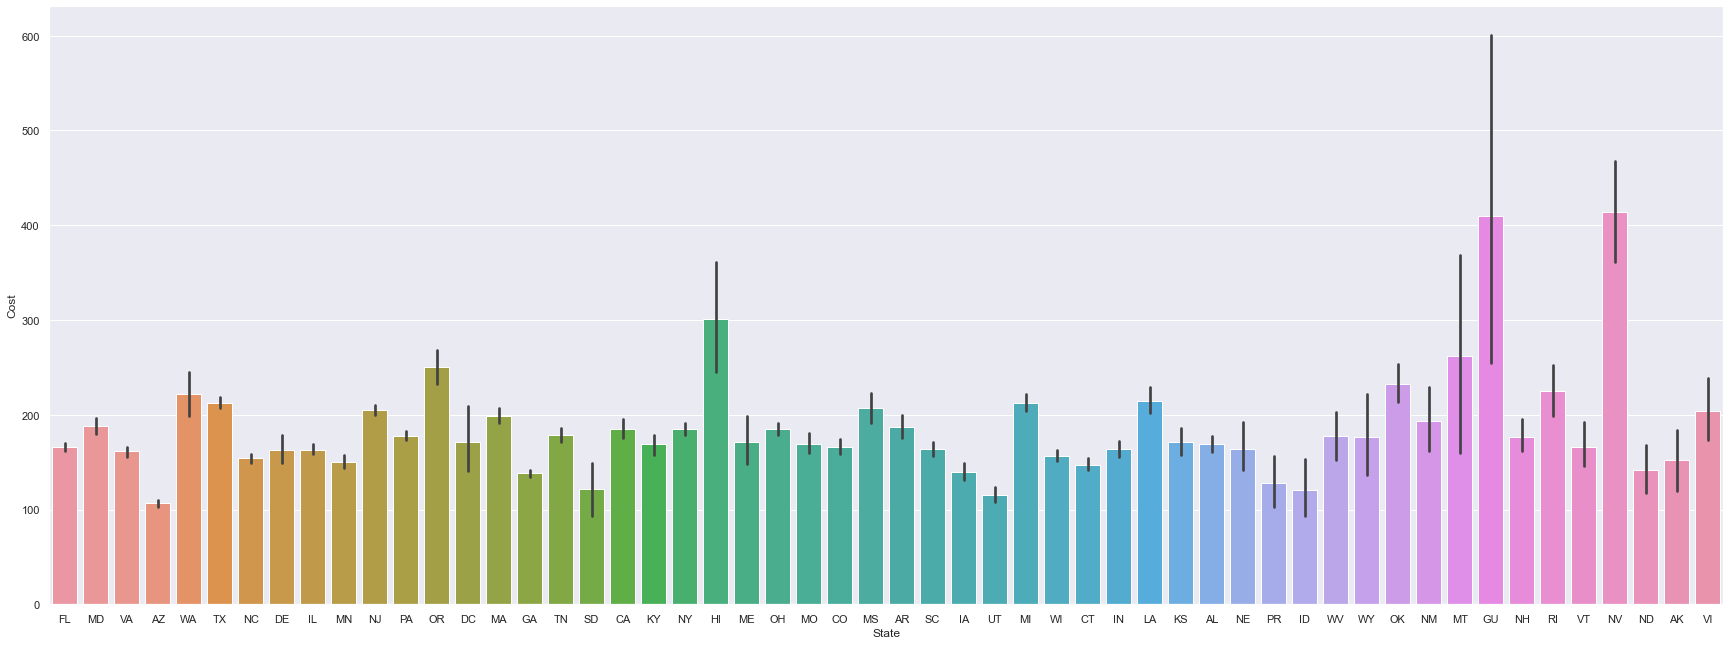

In [119]:
sns.set(rc = {'figure.figsize':(30,11)}) # make the graph big enough to read
sns.barplot(x='State', y='Cost', data=rodf) # set axes

In [120]:
data = rodf.groupby("Mat")["Mat"].count() #prep data for a pie chart - count types of material ('Mat')
data

Mat
C&D     1740
MXR       66
SSR      868
T      42902
WD       891
Name: Mat, dtype: int64

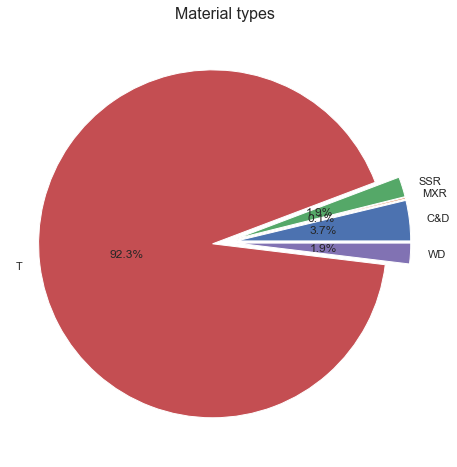

In [121]:
pie, ax = plt.subplots(figsize=[12,8]) # size it up a bit
labels = data.keys() # labels are pcts
plt.pie(x=data, autopct="%.1f%%", explode=[0.07]*5, labels=labels, pctdistance=0.5) # sets pct format and explodes pie slices
plt.title("Material types", fontsize=16); # label and font size

(30.0, 600.0)

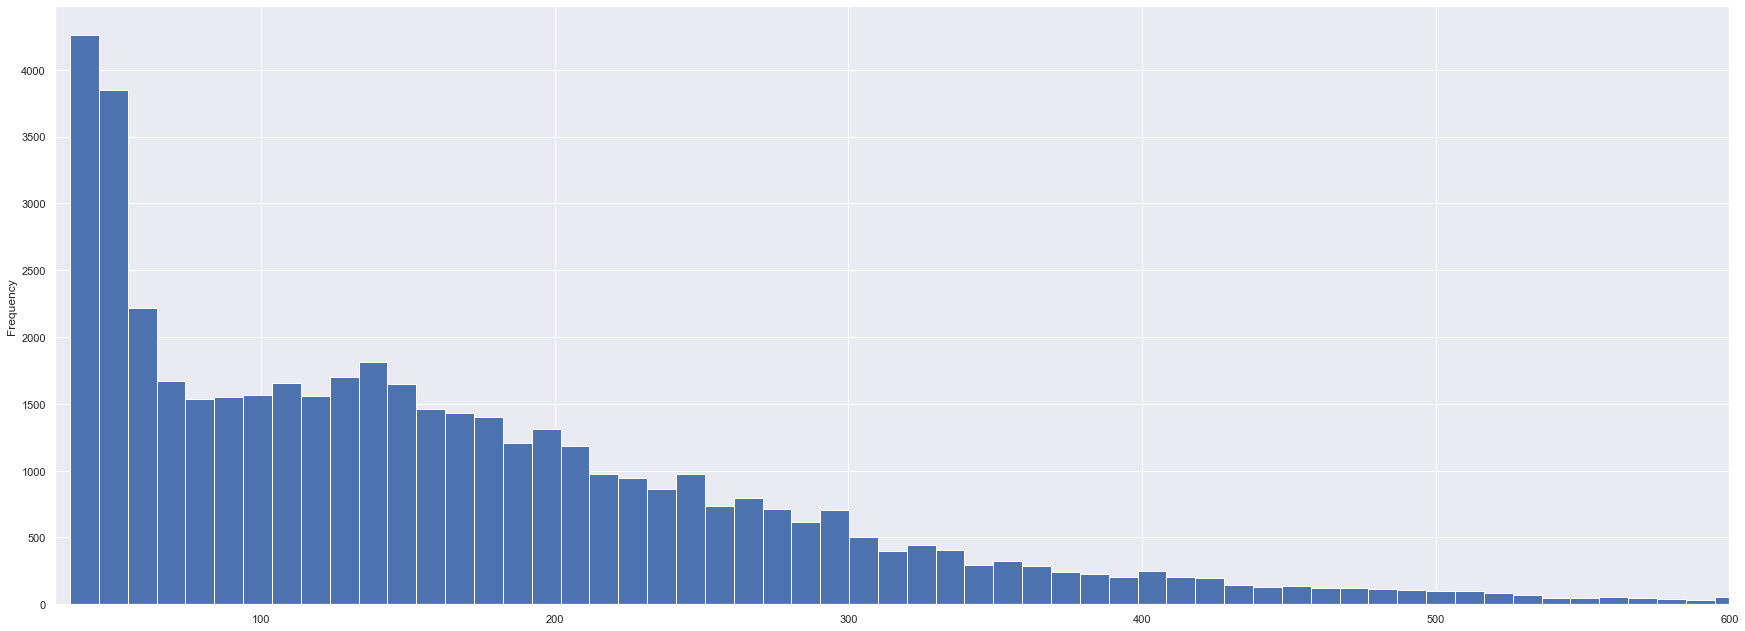

In [128]:
rodf['Cost'].plot.hist(bins=200) # bin discrete costs to get histogram of all costs
plt.xlim([30, 600]) # choose limits of x axis

C:\Users\mersevim\AppData\Local\Continuum\miniconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 1000.0)

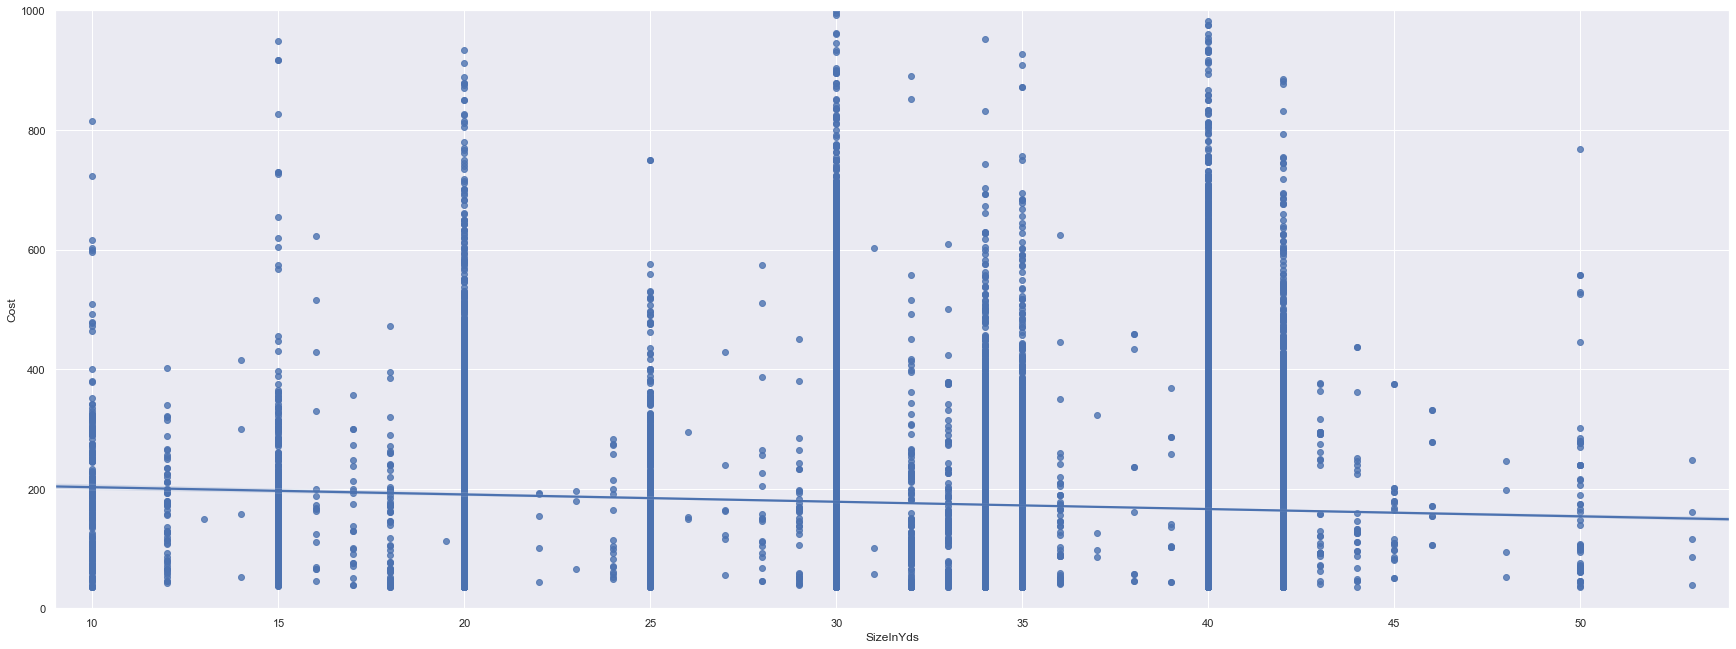

In [127]:
sns.regplot('SizeInYds','Cost',data=rodf) # a scatter/regression plot
plt.xlim([9, 54]) # choose limits of x axis - helps to 'zoom-in' on the majority of the data
plt.ylim([0, 1000]) # choose limits of y axis

C:\Users\mersevim\AppData\Local\Continuum\miniconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


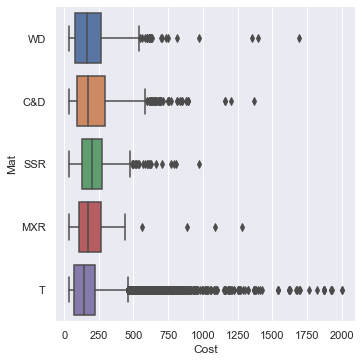

In [129]:
sns.factorplot(x='Cost', y='Mat', kind='box', data=rodf) # see a box&whiskers of cost by trash material types